In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

df=pd.read_csv('C:\\Users\\newms\\Downloads\\loan.csv', sep=',')
# Determining the shape of the datset
df.shape

# listing the null values columns having more than 30%
#emptycol=df.isnull().sum()
#emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
#len(emptycol)

#dropping the unneccessary columns
columns_to_drop = ['pymnt_plan', 'url','emp_title','desc','zip_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal',
                  'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m',
                   'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
                   'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
                   'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75'
                  ,'tax_liens','next_pymnt_d','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','mths_since_last_major_derog']  
lds = df.drop(columns=columns_to_drop)
lds.shape
lds.info()
#title field looks similar to purpose so replace the empty values in title with corresponding purpose


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

C:\Users\newms\AppData\Local\Temp\ipykernel_16504\1972926769.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:\\Users\\newms\\Downloads\\loan.csv', sep=',')


In [6]:
empty_rows = lds['title'].isnull()
#print(empty_rows)
# Copy values from column1 to column2 for those empty rows
lds.loc[empty_rows, 'title'] = lds.loc[empty_rows, 'purpose']
lds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [7]:
#lds.describe()
filtered_lds = lds[lds['loan_status'] == 'Charged Off']
filtered_lds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5627 non-null   int64  
 1   member_id                   5627 non-null   int64  
 2   loan_amnt                   5627 non-null   int64  
 3   funded_amnt                 5627 non-null   int64  
 4   funded_amnt_inv             5627 non-null   float64
 5   term                        5627 non-null   object 
 6   int_rate                    5627 non-null   object 
 7   installment                 5627 non-null   float64
 8   grade                       5627 non-null   object 
 9   sub_grade                   5627 non-null   object 
 10  emp_length                  5399 non-null   object 
 11  home_ownership              5627 non-null   object 
 12  annual_inc                  5627 non-null   float64
 13  verification_status         5627 non-

In [32]:
#This code give what percentage of customers are under chargedOff category.
loan_status_percentage = lds['loan_status'].value_counts(normalize=True) * 100

print("Percentage of each loan status compared to total customers:")
print(loan_status_percentage)

Percentage of each loan status compared to total customers:
loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: proportion, dtype: float64


In [8]:
#removing n/a values from emp_length column for charged off customers
filtered_lds[filtered_lds['emp_length'].isna()].index
filtered_lds = filtered_lds.dropna(subset=['emp_length'])
filtered_lds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5399 entries, 1 to 39688
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5399 non-null   int64  
 1   member_id                   5399 non-null   int64  
 2   loan_amnt                   5399 non-null   int64  
 3   funded_amnt                 5399 non-null   int64  
 4   funded_amnt_inv             5399 non-null   float64
 5   term                        5399 non-null   object 
 6   int_rate                    5399 non-null   object 
 7   installment                 5399 non-null   float64
 8   grade                       5399 non-null   object 
 9   sub_grade                   5399 non-null   object 
 10  emp_length                  5399 non-null   object 
 11  home_ownership              5399 non-null   object 
 12  annual_inc                  5399 non-null   float64
 13  verification_status         5399 non-

In [9]:
# Extracting numerical part from 'Experience' column
filtered_lds['emp_length'] = filtered_lds['emp_length'].astype(str)
filtered_lds['emp_length'] = filtered_lds['emp_length'].str.extract(r'(\d+)').astype(float)

# Converting float to int
filtered_lds['emp_length'] = filtered_lds['emp_length'].astype(int)

filtered_lds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,1,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,1,0.0,0.0


In [16]:
filtered_lds['revol_util'] = filtered_lds['revol_util'].fillna(0)
filtered_lds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5399 entries, 1 to 39688
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5399 non-null   int64  
 1   member_id                   5399 non-null   int64  
 2   loan_amnt                   5399 non-null   int64  
 3   funded_amnt                 5399 non-null   int64  
 4   funded_amnt_inv             5399 non-null   float64
 5   term                        5399 non-null   object 
 6   int_rate                    5399 non-null   object 
 7   installment                 5399 non-null   float64
 8   grade                       5399 non-null   object 
 9   sub_grade                   5399 non-null   object 
 10  emp_length                  5399 non-null   int32  
 11  home_ownership              5399 non-null   object 
 12  annual_inc                  5399 non-null   float64
 13  verification_status         5399 non-

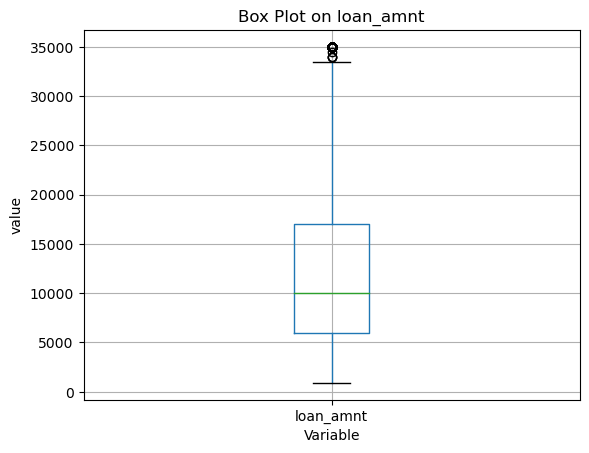

In [31]:
filtered_lds.boxplot(column=['loan_amnt'])

# Adding labels and title
plt.xlabel('Variable')
plt.ylabel('value')
plt.title('Box Plot on loan_amnt')

# Displaying the plot
plt.grid(True)
plt.show()

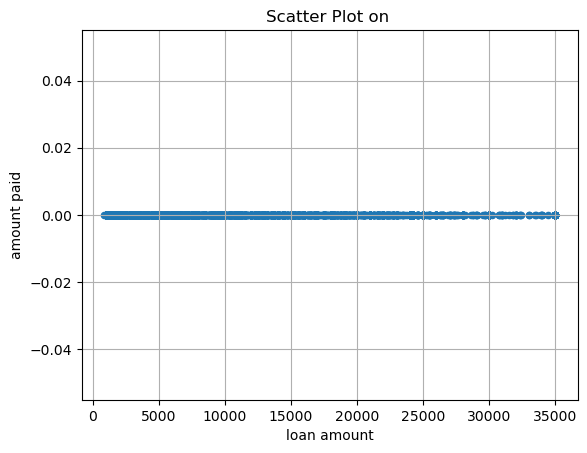

In [47]:
# This graph shows that all the customers who are defaulters have not paid even a single amount from the principle.
filtered_lds.plot(x='loan_amnt', y='out_prncp', kind='scatter')
plt.xlabel('loan amount')
plt.ylabel('amount paid')
plt.title('Scatter Plot on ')

# Displaying the plot
plt.grid(True)
plt.show()

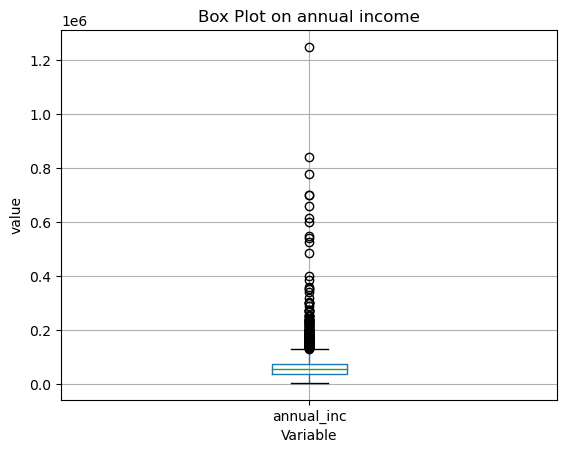

In [63]:
# shows annual income range of the defaulted customers

filtered_lds.boxplot(column=['annual_inc'])

# Adding labels and title
plt.xlabel('Variable')
plt.ylabel('value')
plt.title('Box Plot on annual income')

# Displaying the plot
plt.grid(True)
plt.show()

In [50]:
#removing n/a values from emp_length column for charged off customers
filtered_lds[filtered_lds['emp_length'].isna()].index
filtered_lds = filtered_lds.dropna(subset=['emp_length'])
filtered_lds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5399 entries, 1 to 39688
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5399 non-null   int64  
 1   member_id                   5399 non-null   int64  
 2   loan_amnt                   5399 non-null   int64  
 3   funded_amnt                 5399 non-null   int64  
 4   funded_amnt_inv             5399 non-null   float64
 5   term                        5399 non-null   object 
 6   int_rate                    5399 non-null   object 
 7   installment                 5399 non-null   float64
 8   grade                       5399 non-null   object 
 9   sub_grade                   5399 non-null   object 
 10  emp_length                  5399 non-null   int32  
 11  home_ownership              5399 non-null   object 
 12  annual_inc                  5399 non-null   int32  
 13  verification_status         5399 non-

In [65]:
# Extracting numerical part from 'Experience' column
filtered_lds['emp_length'] = filtered_lds['emp_length'].astype(str)
filtered_lds['emp_length'] = filtered_lds['emp_length'].str.extract(r'(\d+)').astype(float)

# Converting float to int
filtered_lds['emp_length'] = filtered_lds['emp_length'].astype(int)

filtered_lds.head()

C:\Users\newms\AppData\Local\Temp\ipykernel_24052\2589250440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_lds['emp_length'] = filtered_lds['emp_length'].astype(str)
C:\Users\newms\AppData\Local\Temp\ipykernel_24052\2589250440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_lds['emp_length'] = filtered_lds['emp_length'].str.extract(r'(\d+)').astype(float)
C:\Users\newms\AppData\Local\Temp\ipykernel_24052\2589250440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a c

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,1,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,1,0.0,0.0


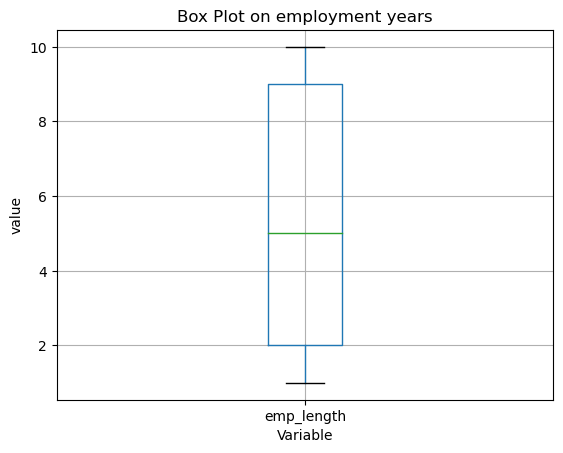

In [47]:
# trying to find out what is years of employment for the defaulted customers
#looks like most of the people who went to defaulted are having arround only 5 years of employemnt, so they must be still struggling to stabilise their finances.


filtered_lds.boxplot(column=['emp_length'])

# Adding labels and title
plt.xlabel('Variable')
plt.ylabel('value')
plt.title('Box Plot on employment years')

# Displaying the plot
plt.grid(True)
plt.show()

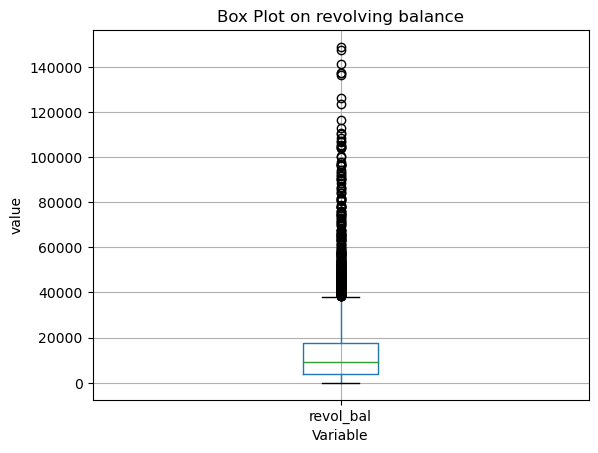

In [65]:
# The revolving balance represents the outstanding debt on a revolving credit account.

filtered_lds.boxplot(column=['revol_bal'])

# Adding labels and title
plt.xlabel('Variable')
plt.ylabel('value')
plt.title('Box Plot on revolving balance')

# Displaying the plot
plt.grid(True)
plt.show()

In [56]:
# Remove '%' symbol and convert to float
filtered_lds['revol_util'] =filtered_lds['revol_util'].str.rstrip('%').astype(float)

filtered_lds.revol_util.head(5)

#filtered_lds['revol_util'] = filtered_lds['revol_util'].astype(int)


1      9.4
8     32.6
9     36.5
12    91.7
14    55.5
Name: revol_util, dtype: float64

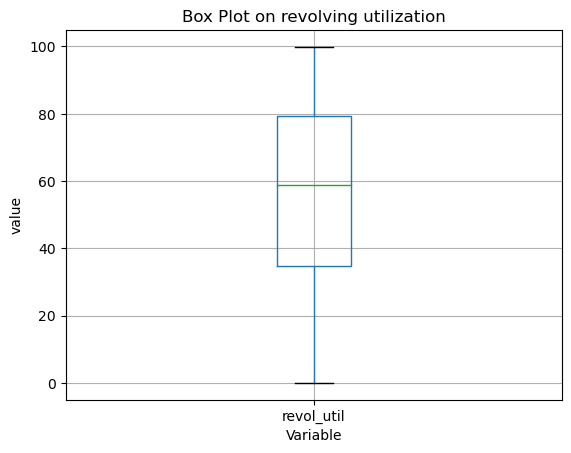

In [66]:
# This is a % value which shows
filtered_lds.boxplot(column=['revol_util'])

# Adding labels and title
plt.xlabel('Variable')
plt.ylabel('value')
plt.title('Box Plot on revolving utilization')

# Displaying the plot
plt.grid(True)
plt.show()

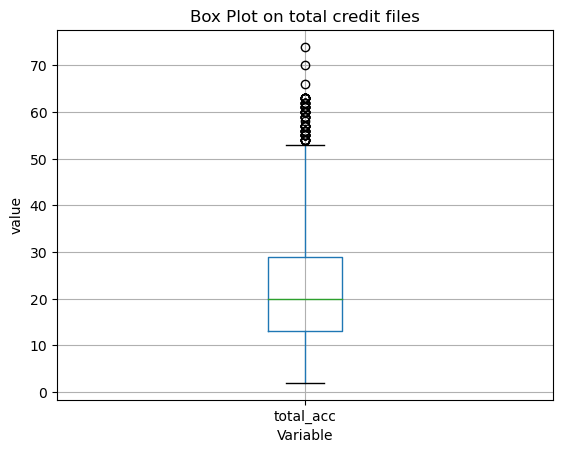

In [62]:
filtered_lds.boxplot(column=['total_acc'])

# Adding labels and title
plt.xlabel('Variable')
plt.ylabel('value')
plt.title('Box Plot on total credit files')

# Displaying the plot
plt.grid(True)
plt.show()